In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, BaggingRegressor, BaggingClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")

In [30]:
d = pd.read_csv('CAR DETAILS.csv')
df = pd.DataFrame(d)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [31]:
print(type('fuel'))

<class 'str'>


In [32]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [33]:
#df = df.dropna()
#print(df)

In [34]:
df.duplicated().sum()

763

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

0

In [37]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [38]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [39]:
# Drop redundant features
#df = df.drop(['torque', 'engine', 'max_power'], axis=1)

In [40]:
## Handle data consistency (Example: correcting typos in categorical data)
df['fuel'] = df['fuel'].str.lower()  # Example for a categorical column

In [41]:
## Change data types (if necessary)
df['year'] = pd.to_datetime(df['year'], format='%Y')  # Example for a date column
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007-01-01,60000,70000,petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007-01-01,135000,50000,petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012-01-01,600000,100000,diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017-01-01,250000,46000,petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014-01-01,450000,141000,diesel,Individual,Manual,Second Owner


In [42]:
## Feature Engineering (Example: creating new features)
df['age'] = 2024 - df['year'].dt.year  # Assuming current year is 2024
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007-01-01,60000,70000,petrol,Individual,Manual,First Owner,17
1,Maruti Wagon R LXI Minor,2007-01-01,135000,50000,petrol,Individual,Manual,First Owner,17
2,Hyundai Verna 1.6 SX,2012-01-01,600000,100000,diesel,Individual,Manual,First Owner,12
3,Datsun RediGO T Option,2017-01-01,250000,46000,petrol,Individual,Manual,First Owner,7
4,Honda Amaze VX i-DTEC,2014-01-01,450000,141000,diesel,Individual,Manual,Second Owner,10


In [43]:
## Outlier treatment (Example using IQR method)
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['selling_price'] < (Q1 - 1.5 * IQR)) | (df['selling_price'] > (Q3 + 1.5 * IQR)))]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007-01-01,60000,70000,petrol,Individual,Manual,First Owner,17
1,Maruti Wagon R LXI Minor,2007-01-01,135000,50000,petrol,Individual,Manual,First Owner,17
2,Hyundai Verna 1.6 SX,2012-01-01,600000,100000,diesel,Individual,Manual,First Owner,12
3,Datsun RediGO T Option,2017-01-01,250000,46000,petrol,Individual,Manual,First Owner,7
4,Honda Amaze VX i-DTEC,2014-01-01,450000,141000,diesel,Individual,Manual,Second Owner,10


In [44]:
# Encoding categorical variables
categorical_columns = df.dtypes[df.dtypes=='object'].index
numerical_columns = df.dtypes[df.dtypes!='object'].index
print(categorical_columns)
print(numerical_columns)
#categorical_columns = df.select_dtypes(include=['object']).columns
#df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#df.head()

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven', 'age'], dtype='object')


In [45]:
for i in categorical_columns:
    print(i,df[i].unique(),df[i].unique())

name ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi'] ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel ['petrol' 'diesel' 'cng' 'lpg' 'electric'] ['petrol' 'diesel' 'cng' 'lpg' 'electric']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer'] ['Individual' 'Dealer' 'Trustmark Dealer']
transmission ['Manual' 'Automatic'] ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


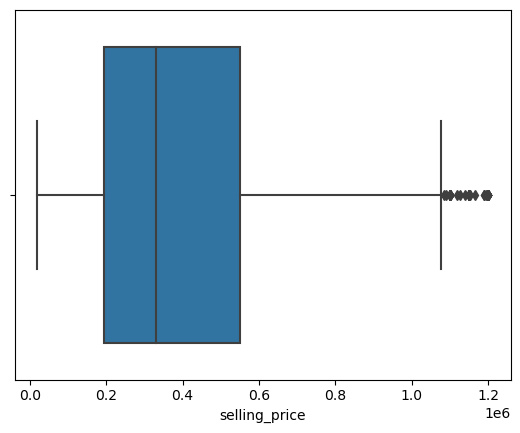

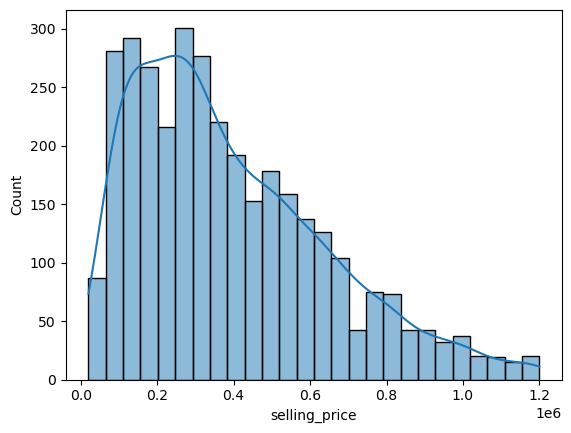

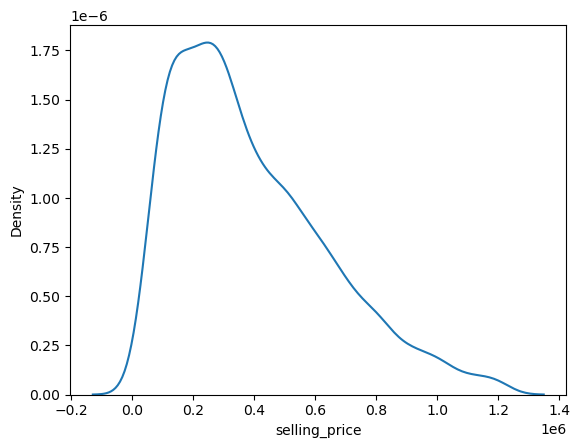

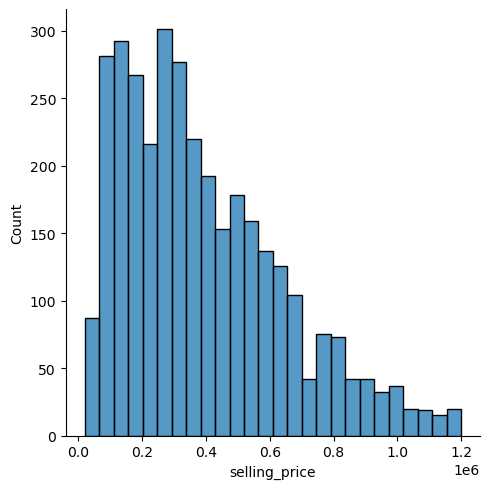

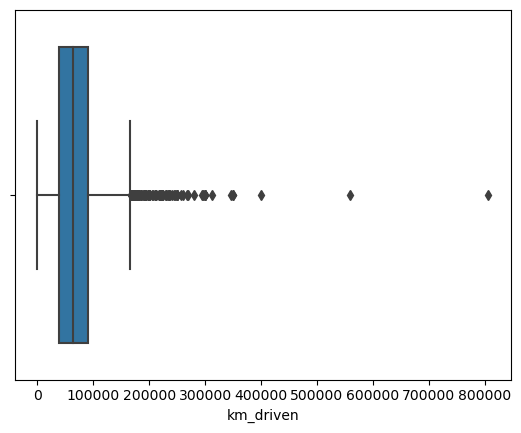

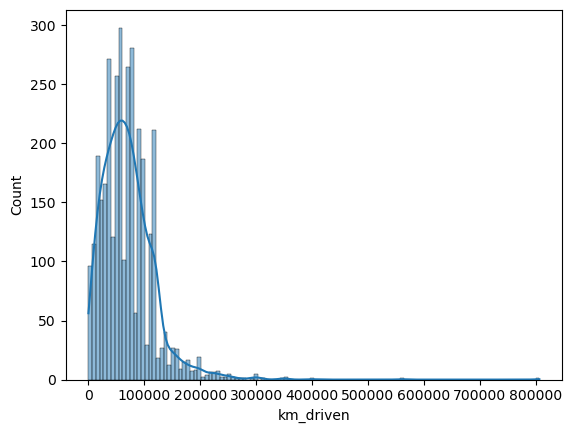

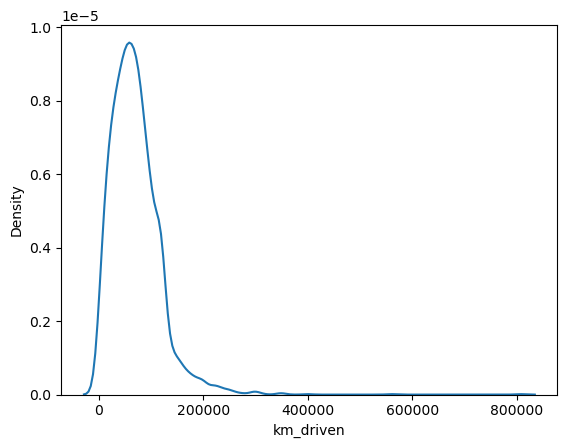

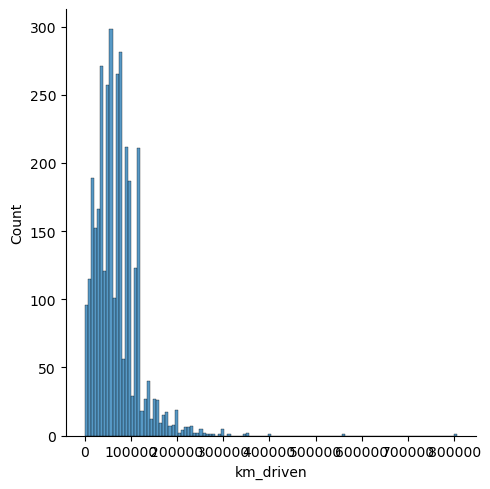

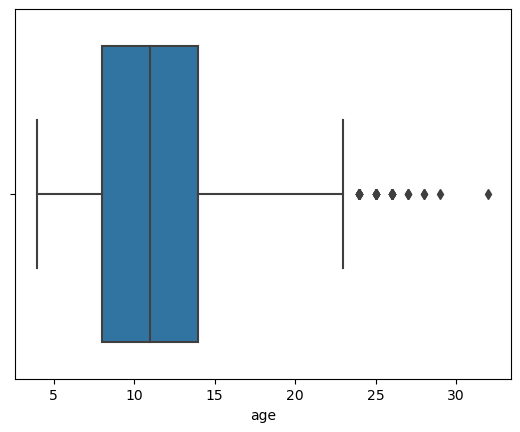

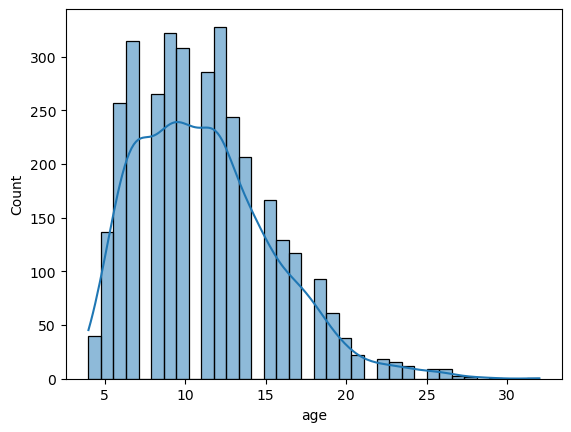

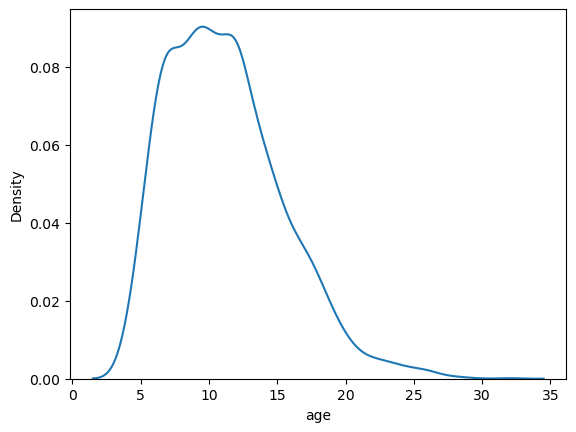

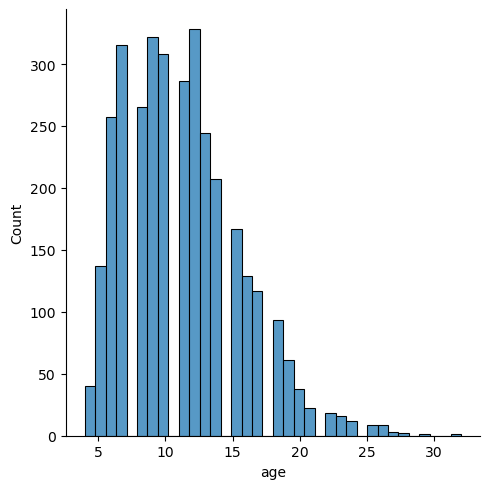

In [18]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.show()
    sns.histplot(df[col], kde=True)
    plt.show()
    sns.kdeplot(df[col])
    plt.show()
    sns.displot(df[col])
    plt.show()

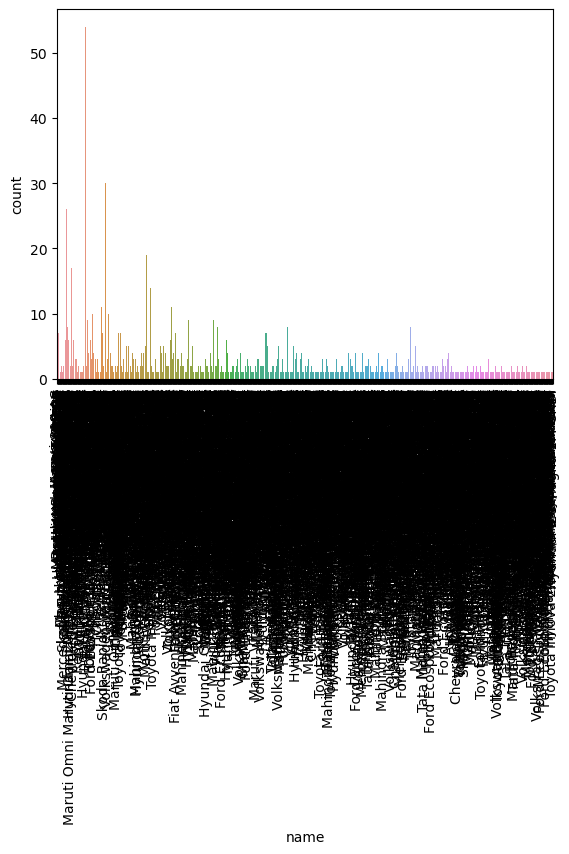

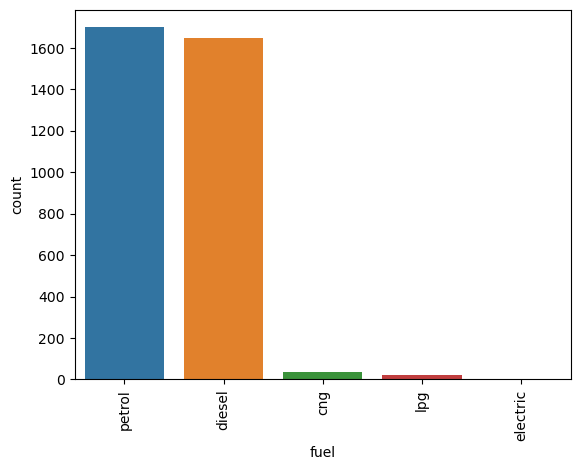

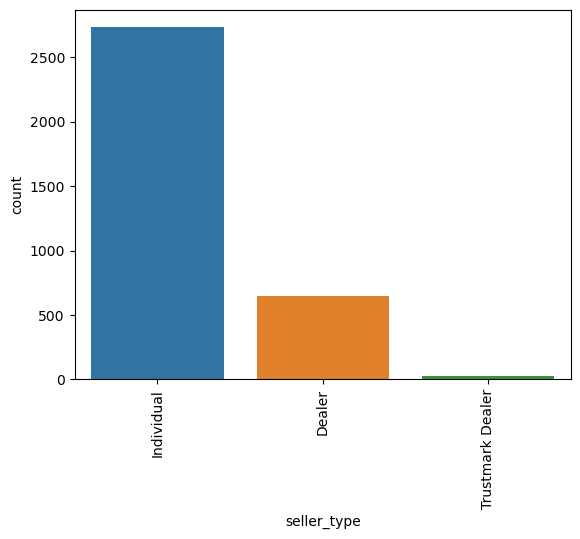

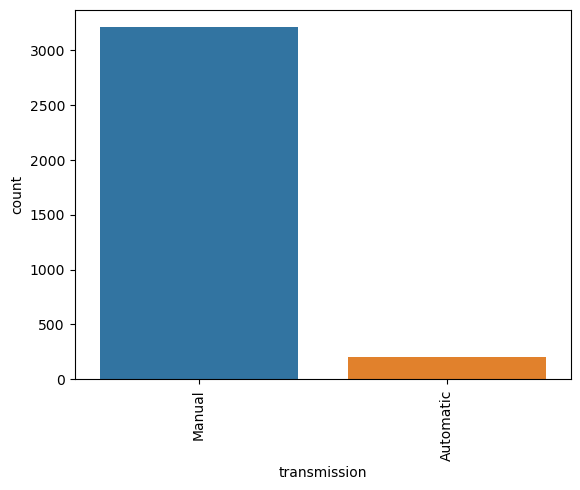

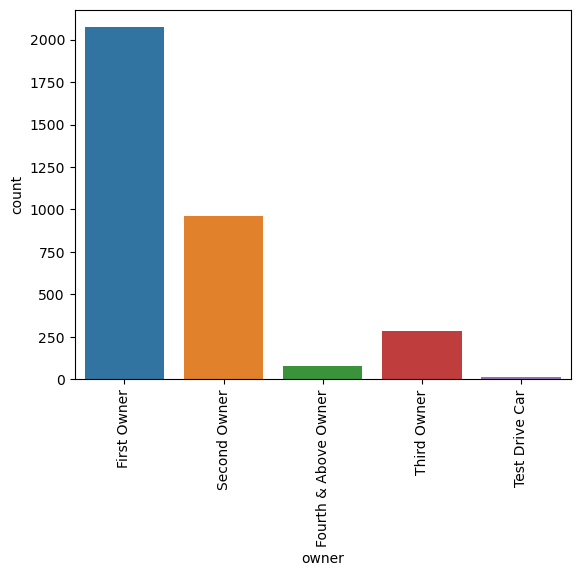

In [19]:
### Categorical columns
for col in categorical_columns:
    if col in df.columns:
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
        plt.show()

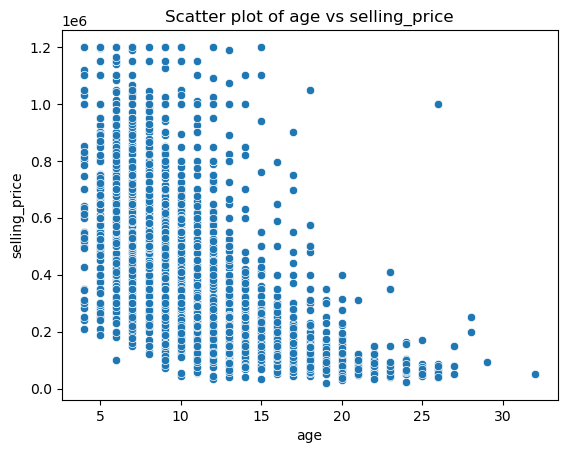

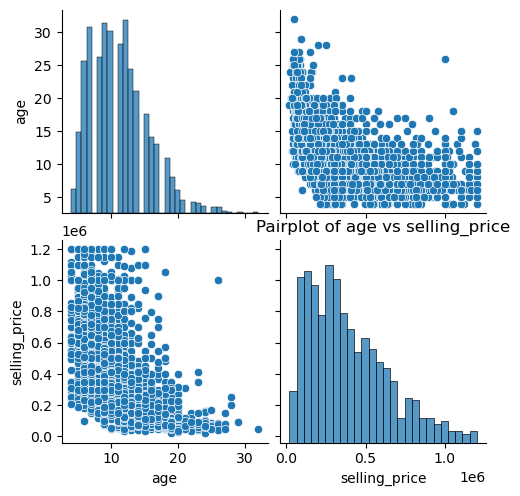

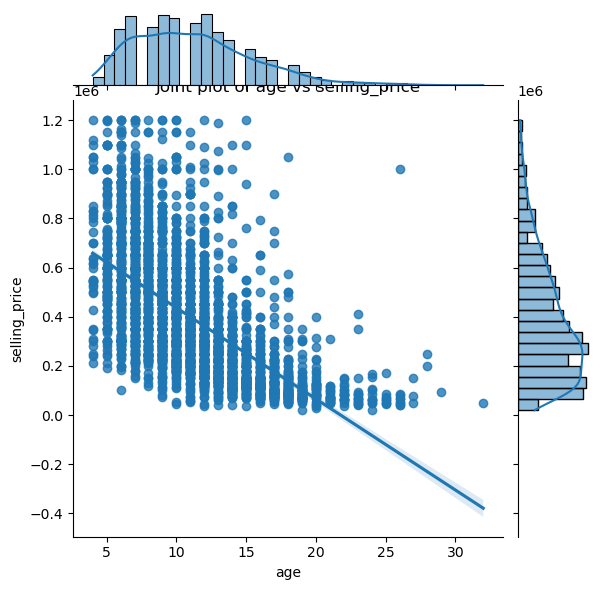

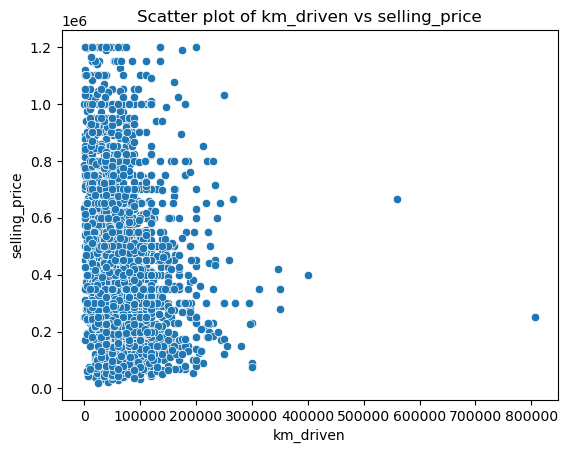

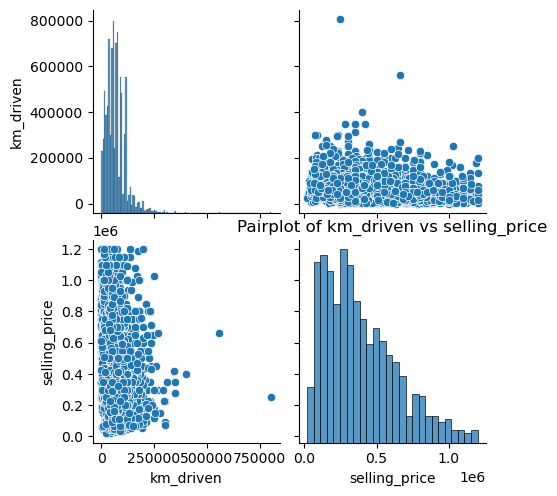

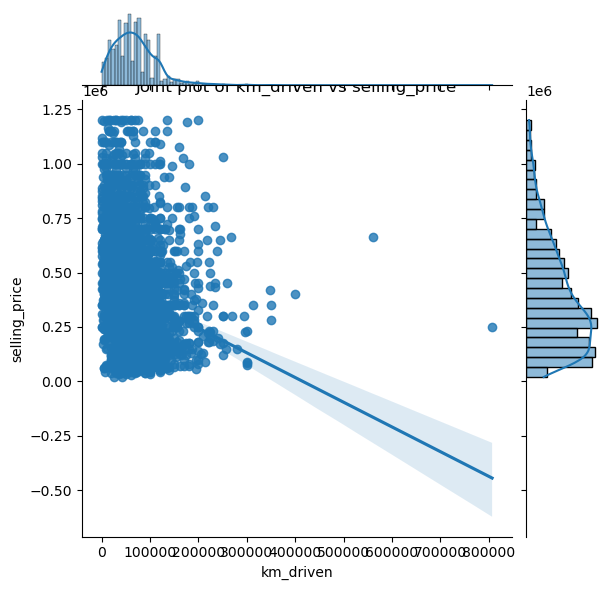

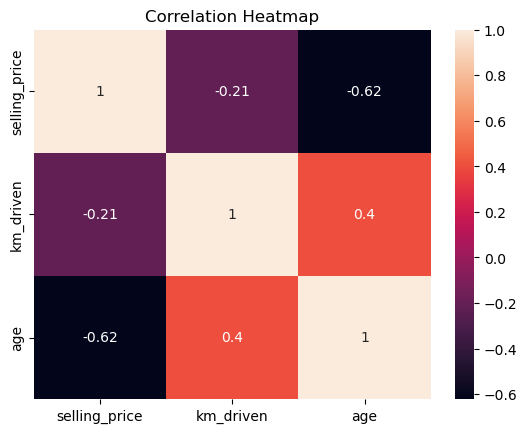

In [20]:
## Bi-variate Data Analysis
### Numerical-Numerical columns
numerical_pairs = [('age', 'selling_price'), ('km_driven', 'selling_price')]
for x, y in numerical_pairs:
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'Scatter plot of {x} vs {y}')
    plt.show()
    sns.pairplot(df[[x, y]])
    plt.title(f'Pairplot of {x} vs {y}')
    plt.show()
    sns.jointplot(x=x, y=y, data=df, kind='reg')
    plt.title(f'Joint plot of {x} vs {y}')
    plt.show()

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

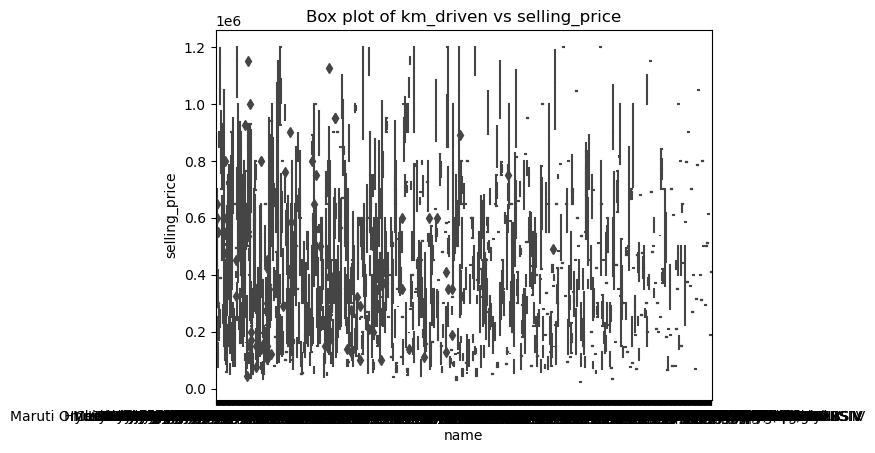

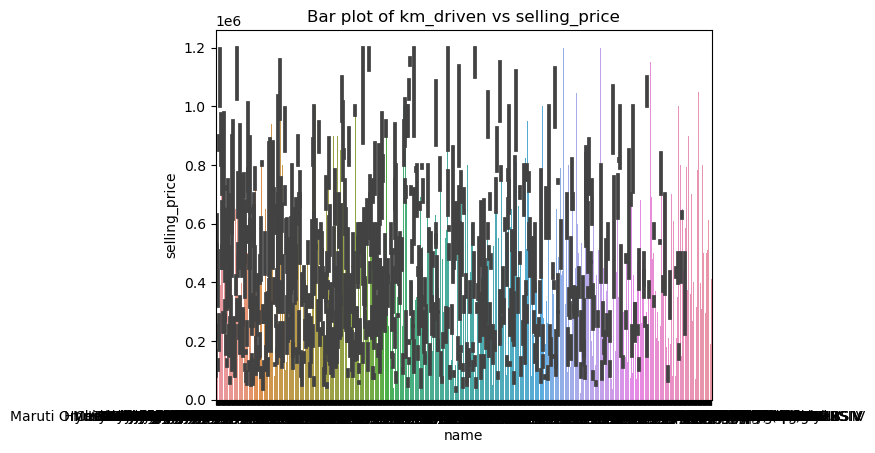

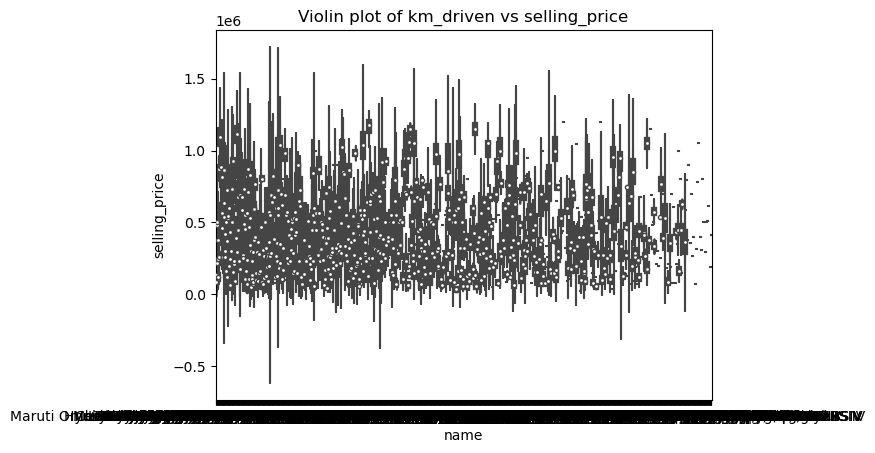

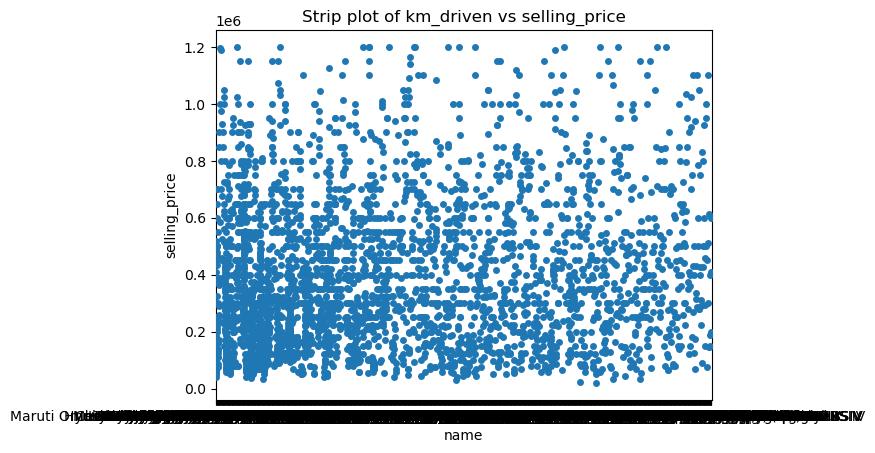

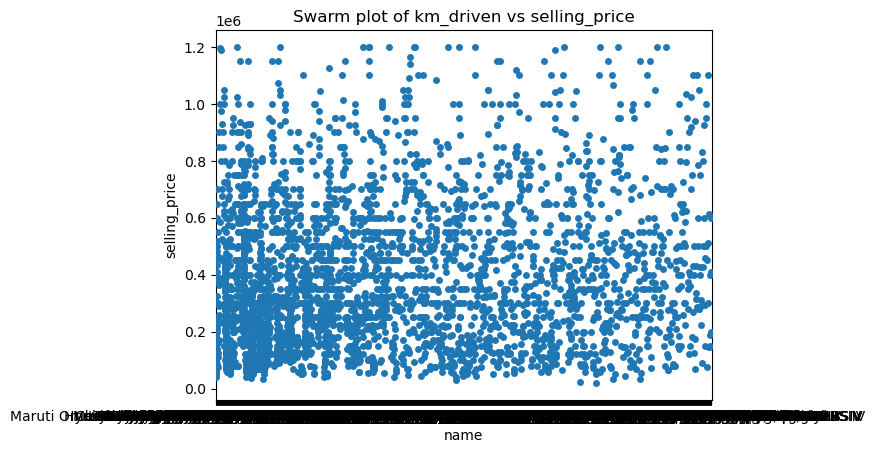

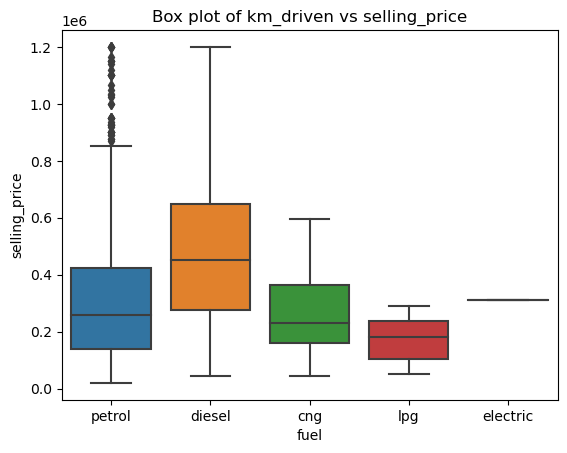

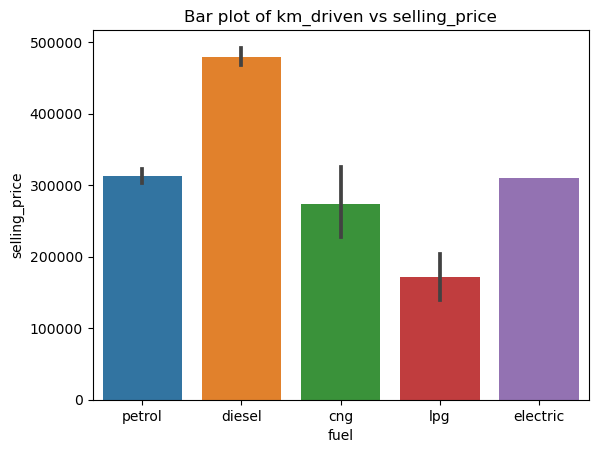

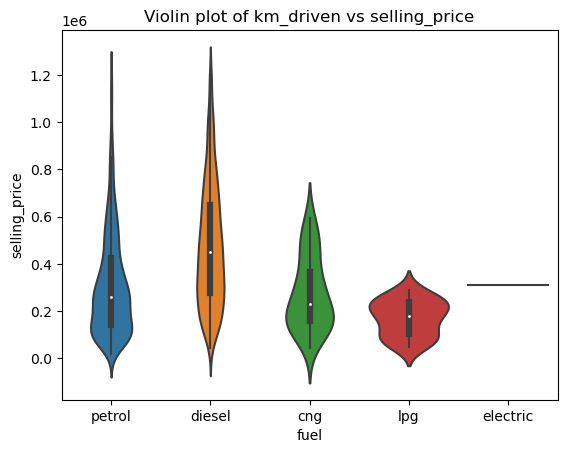

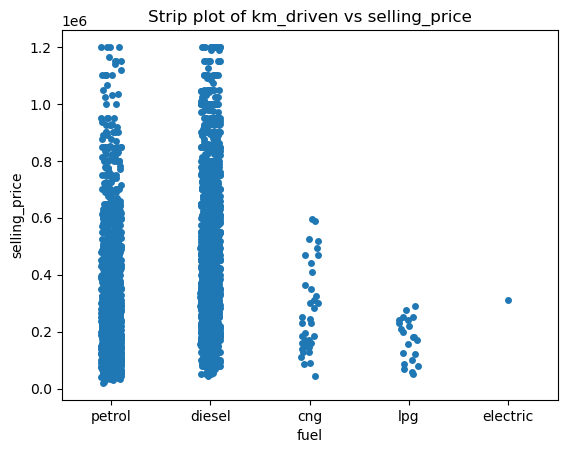

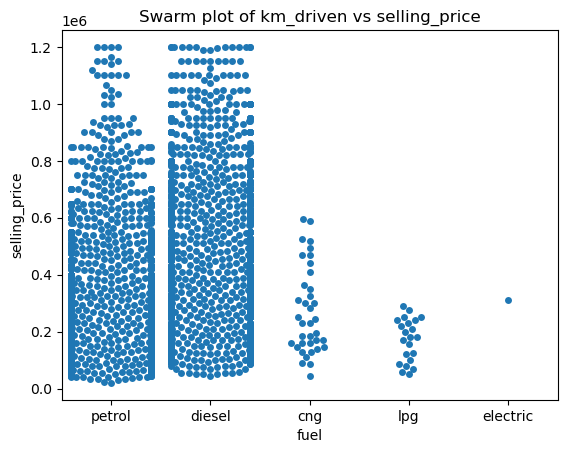

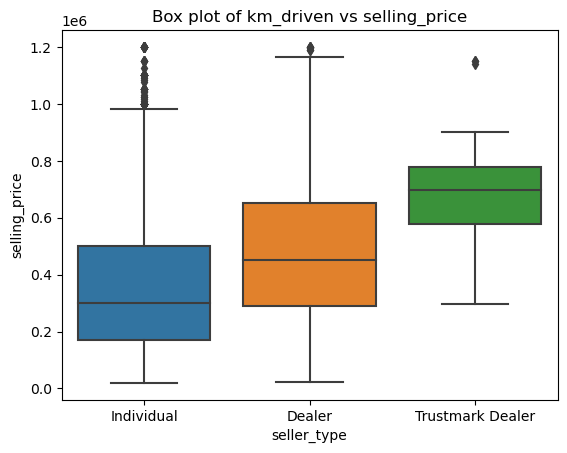

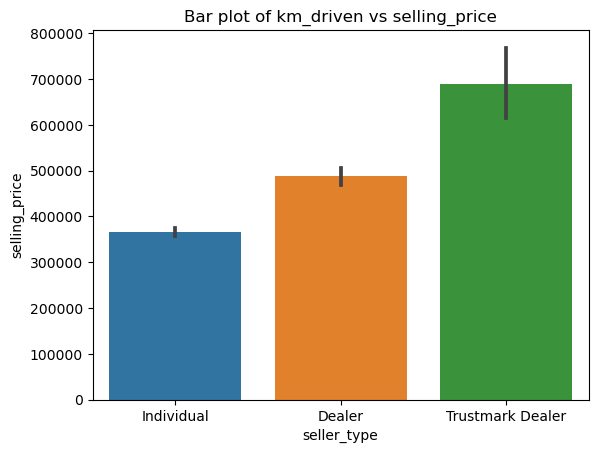

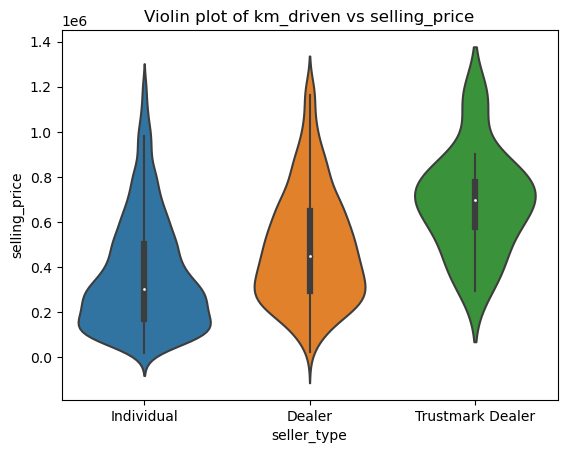

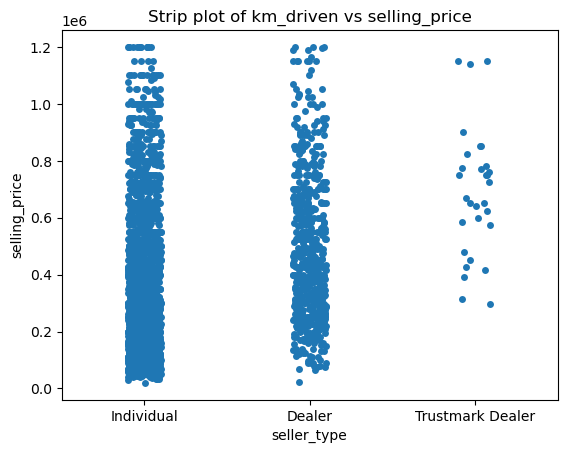

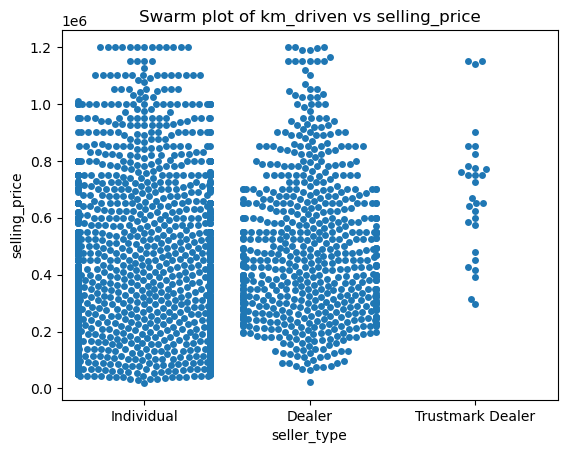

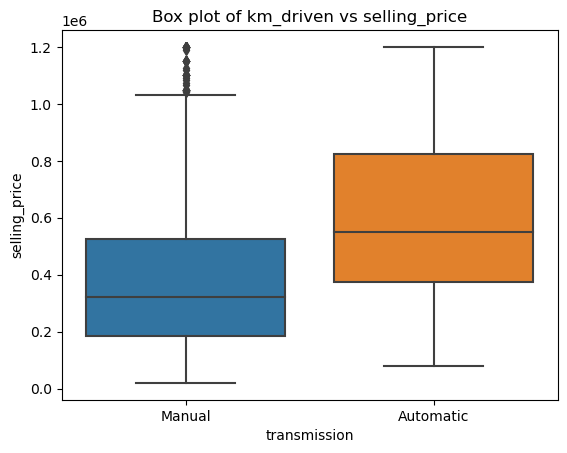

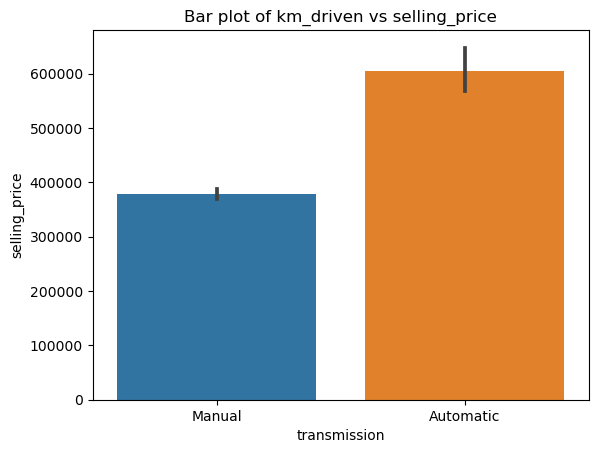

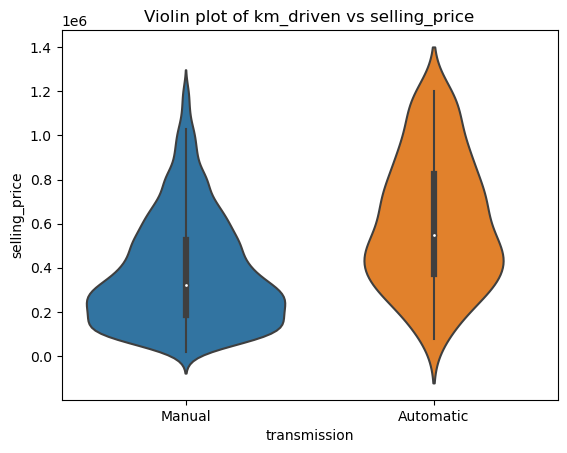

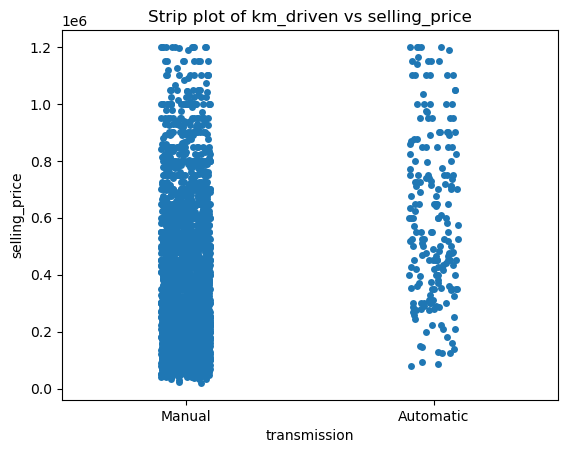

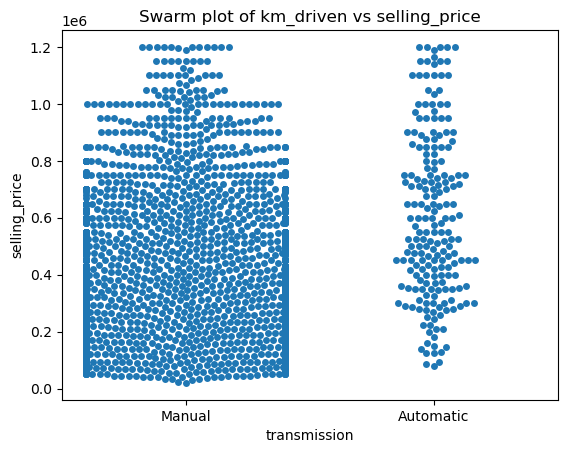

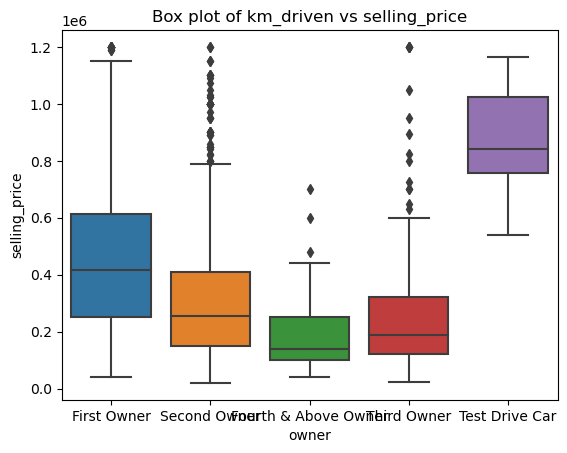

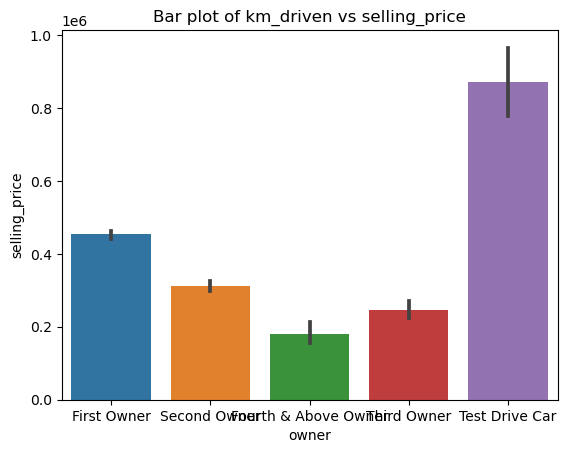

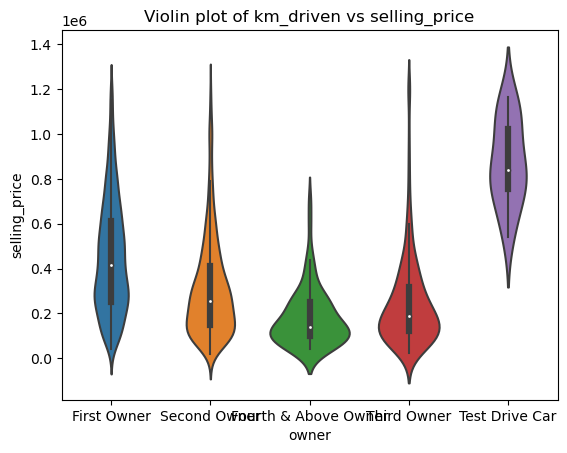

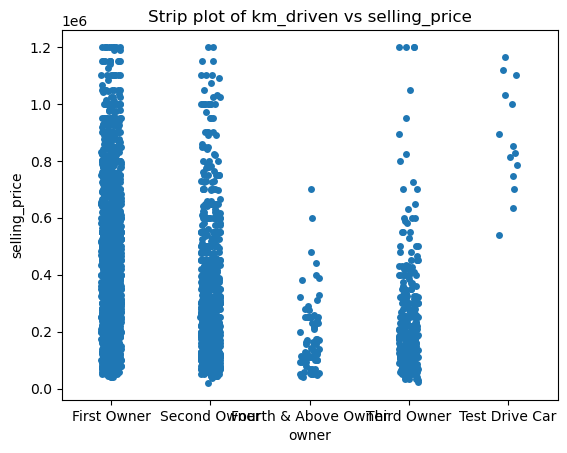

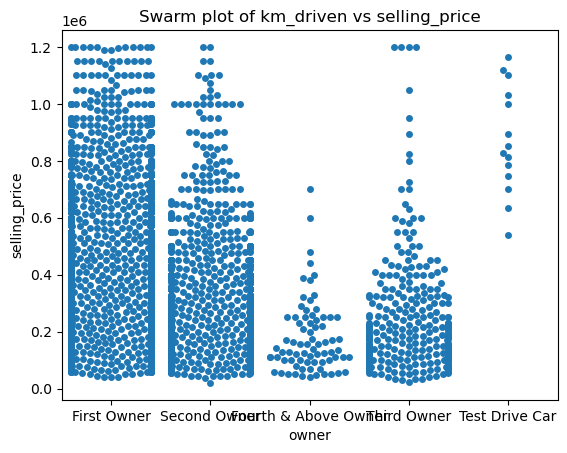

In [21]:
### Numerical-Categorical columns
for col in categorical_columns:
    if col in df.columns:
        sns.boxplot(x=col, y='selling_price', data=df)
        plt.title(f'Box plot of {x} vs {y}')
        plt.show()
        sns.barplot(x=col, y='selling_price', data=df)
        plt.title(f'Bar plot of {x} vs {y}')
        plt.show()
        sns.violinplot(x=col, y='selling_price', data=df)
        plt.title(f'Violin plot of {x} vs {y}')
        plt.show()
        sns.stripplot(x=col, y='selling_price', data=df)
        plt.title(f'Strip plot of {x} vs {y}')
        plt.show()
        sns.swarmplot(x=col, y='selling_price', data=df)
        plt.title(f'Swarm plot of {x} vs {y}')
        plt.show()

In [46]:
### Categorical-Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col in df.columns and 'seller_type_individual' in df.columns:
        sns.countplot(x=col, hue='seller_type_individual', data=df)
        plt.title(f'Count plot of {col} vs seller_type_individual')
        plt.show()
        pd.crosstab(df[col], df['seller_type_individual']).plot(kind='bar')
        plt.title(f'Crosstab of {col} vs seller_type_individual')
        plt.show()

In [47]:
# Select X and y
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [48]:
# Ensure only numeric columns are included
X = X.select_dtypes(include=[np.number])

In [49]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2725, 2)
(682, 2)
(2725,)
(682,)


In [50]:
#Scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify scaling
print(f'First 5 rows of scaled training data:\n{X_train_scaled[:5]}')
print(f'First 5 rows of scaled testing data:\n{X_test_scaled[:5]}')

First 5 rows of scaled training data:
[[ 2.36975099  0.18958466]
 [ 0.81409241 -0.28329241]
 [-0.01559216 -0.99260801]
 [-0.08234029  1.13533879]
 [ 1.12522413 -0.75616947]]
First 5 rows of scaled testing data:
[[-1.08381105 -0.99260801]
 [-0.22301331  0.66246173]
 [ 0.60667127 -0.28329241]
 [-0.22301331 -0.04685387]
 [ 1.02151356  2.55396999]]


In [51]:
#Create a model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if model._estimator_type == 'regressor':
        print('Mean Squared Error:', mean_squared_error(y_test, predictions))
        print('R2 Score:', r2_score(y_test, predictions))
    elif model._estimator_type == 'classifier':
        print('Accuracy Score:', accuracy_score(y_test, predictions))
        print('Classification Report:\n', classification_report(y_test, predictions))
        print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

In [52]:
#Implement different ML models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'SVR': SVR(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Naive Bayes Classifier': GaussianNB(),
    'SVM Classifier': SVC(),
    'GradientBoosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier()
}

In [ ]:
# Generate predictions for the test data and evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

Evaluating Linear Regression
Mean Squared Error: 36165327045.7016
R2 Score: 0.4079476126012096
Evaluating Ridge Regression
Mean Squared Error: 36164432956.759895
R2 Score: 0.4079622494795603
Evaluating Lasso Regression
Mean Squared Error: 36165297914.20821
R2 Score: 0.4079480895046863
Evaluating Decision Tree Regressor
Mean Squared Error: 55125832188.092354
R2 Score: 0.09755052088809313
Evaluating Random Forest Regressor
Mean Squared Error: 41330653664.76081
R2 Score: 0.3233875047209739
Evaluating KNN Regressor
Mean Squared Error: 37440078657.23806
R2 Score: 0.38707901285104296
Evaluating AdaBoost Regressor
Mean Squared Error: 37826277703.296524
R2 Score: 0.38075665699508443
Evaluating Bagging Regressor
Mean Squared Error: 44238863280.55429
R2 Score: 0.27577802385243877
Evaluating SVR
Mean Squared Error: 64797410835.34613
R2 Score: -0.06078017029536542
Evaluating GradientBoosting Regressor
Mean Squared Error: 33338308898.825844
R2 Score: 0.4542279307900209
Evaluating XGBoost Regressor


In [53]:
#Save the model and dataframe (if required) using pickle
best_model = RandomForestRegressor()  # Example: Assuming RandomForestRegressor was the best model
best_model.fit(X_train_scaled, y_train)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)